# HW1

### (a)
从自回归模型
$$
x_t = -0.9x_{t-2}+w_t
$$
生成n=100个观测，其中$\sigma_w$=1。然后，对$x_t$使用滑动平均，
$$
v_t = (x_t+x_{t-1}+x_{t-2}+x_{t-3})/4
$$
把$x_t$画在图上，并在同一张图上以虚线画$v_t$。评价$x_t$曲线的表现，并说明，对它3做滑动平均如何改变了$x_t$的表现。  

$(Solution).$

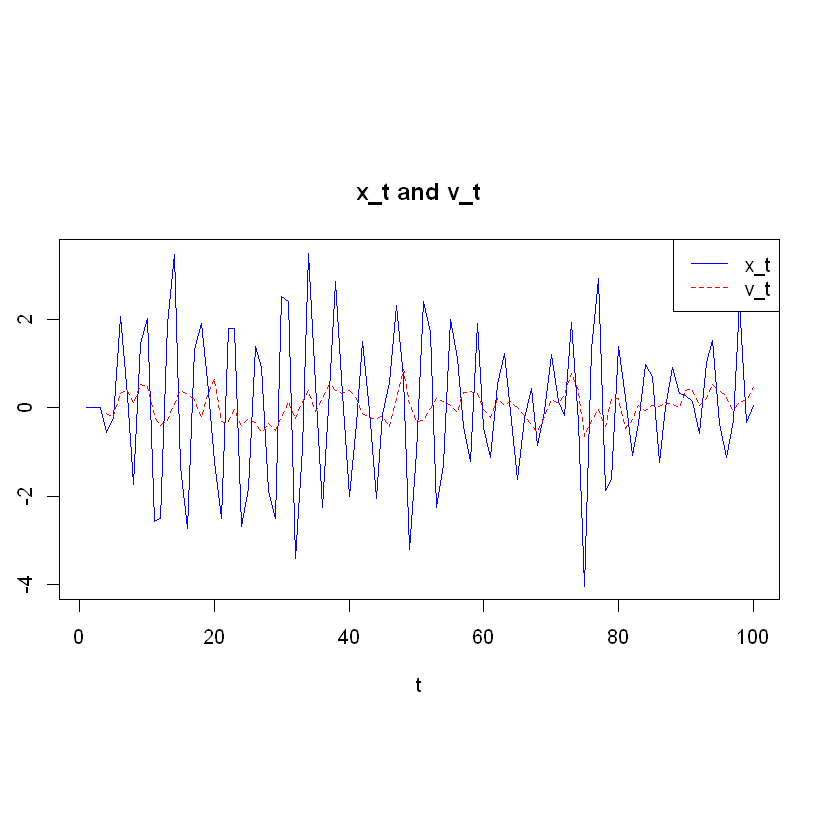

In [27]:
# 设置参数
n <- 100
sigma_w <- 1
set.seed(123)  # 设置随机种子以保证结果可重复

# 生成自回归模型数据
x <- rep(0, n)
for (t in 4:n) {
  x[t] <- -0.9 * x[t-2] + rnorm(1, mean = 0, sd = sigma_w)
}

# 滑动平均
v <- rep(NA, n)
for (t in 4:n) {
  v[t] <- (x[t] + x[t-1] + x[t-2] + x[t-3]) / 4
}

# 绘制图像
par(pin = c(6,3))
plot(x, type = "l", col = "blue", ylim = range(c(x, v), na.rm = TRUE), 
     xlab = "t", ylab = "Value", main = "x_t and v_t")
lines(v, type = "l", col = "red", lty = 2)
legend("topright", legend = c("x_t", "v_t"), col = c("blue", "red"), lty = c(1, 2))

自回归模型生成的序列 $x_t$，是由前两期的值和白噪声w_t决定的。由于系数为 −0.9，还是比较大的，所以序列呈现出明显的周期性和振荡性。  

而通过计算滑动平均 $v_t$，序列的波动被平滑化。滑动平均可以减少短期波动，使趋势更加明显。  

在图中，$v_t$的曲线更加平滑，振荡幅度减小。

### (b)
重复(a)，但令
$$
x_t = \cos(2 \pi t / 4)
$$  

$(Solution).$


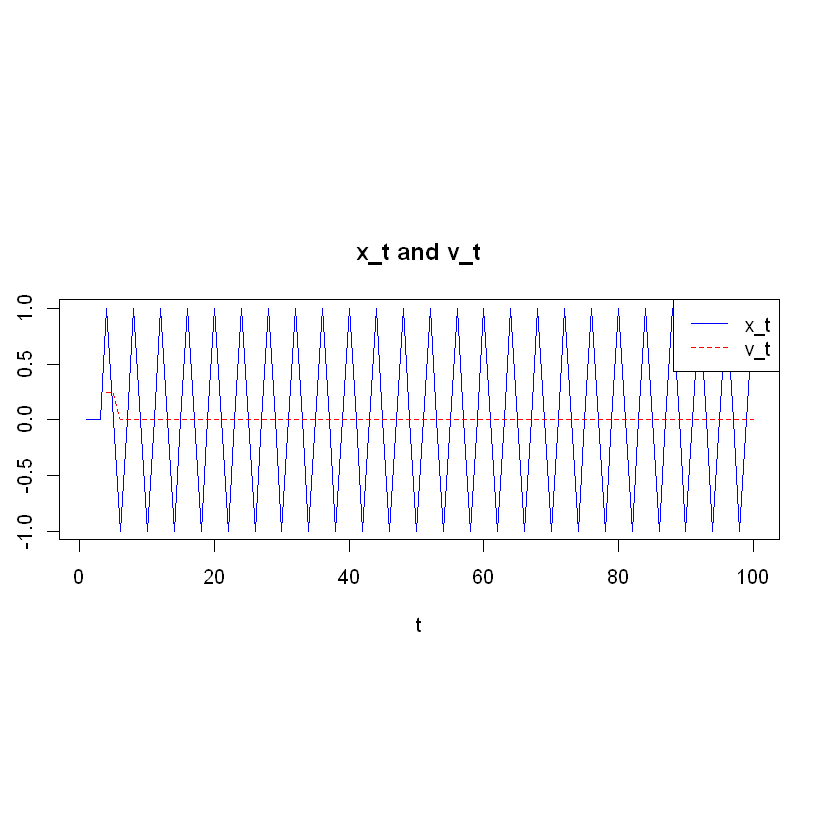

In [31]:
# 设置参数
n <- 100
sigma_w <- 1
set.seed(123)  # 设置随机种子以保证结果可重复

# 生成自回归模型数据
x <- rep(0, n)
for (t in 4:n) {
  x[t] <- cos(2* pi * t /4)
}

# 滑动平均
v <- rep(NA, n)
for (t in 4:n) {
  v[t] <- (x[t] + x[t-1] + x[t-2] + x[t-3]) / 4
}

# 绘制图像
par(pin = c(6,2))
plot(x, type = "l", col = "blue", ylim = range(c(x, v), na.rm = TRUE), 
     xlab = "t", ylab = "Value", main = "x_t and v_t")
lines(v, type = "l", col = "red", lty = 2)
legend("topright", legend = c("x_t", "v_t"), col = c("blue", "red"), lty = c(1, 2))

余弦函数生成的序列 $x_t$是一个周期为 4 的余弦函数，呈现出明显的周期性。  

滑动平均后的序列$v_t$仍然保持周期性，但波动幅度略有减小。  

总的来说，滑动平均现在对周期性信号的影响较小，因为周期性信号本身是平滑的。

### (c)
重复(b)，但加上一个$N(0,1)$的白噪声
$$
x_t = \cos(2 \pi t / 4) + w_t
$$  
$(Solution).$

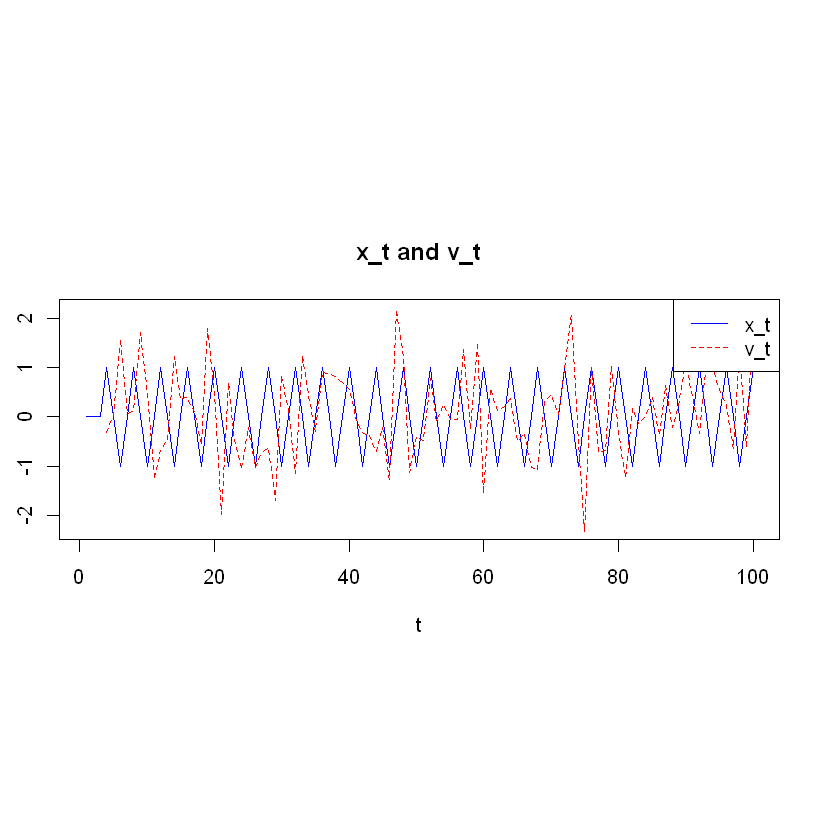

In [32]:
# 设置参数
n <- 100
sigma_w <- 1
set.seed(123)  # 设置随机种子以保证结果可重复

# 生成自回归模型数据
x <- rep(0, n)
for (t in 4:n) {
  x[t] <- cos(2* pi * t /4)
}

# 滑动平均
v <- rep(NA, n)
for (t in 4:n) {
  v[t] <- (x[t] + x[t-1] + x[t-2] + x[t-3]) / 4 + rnorm(1, mean = 0, sd = 1)
}

# 绘制图像
par(pin = c(6,2))
plot(x, type = "l", col = "blue", ylim = range(c(x, v), na.rm = TRUE), 
     xlab = "t", ylab = "Value", main = "x_t and v_t")
lines(v, type = "l", col = "red", lty = 2)
legend("topright", legend = c("x_t", "v_t"), col = c("blue", "red"), lty = c(1, 2))

余弦函数加白噪声生成的序列$x_t$是一个周期性信号加上随机噪声，因此呈现出明显的随机波动。  

滑动平均可以有效减少白噪声的影响，使周期性信号更加清晰。滑动平均后的序列$v_t$的波动幅度减小，周期性特征更加明显。

### (d)
比较(a)、(b)、(c)  

$(Answer).$

#### **(a) 自回归模型**
- **原始序列 $ x_t $**：  
  自回归模型 $ x_t = -0.9x_{t-2} + w_t $ 生成的序列呈现出明显的振荡性。由于自回归系数为 $-0.9$，序列表现出周期性，且白噪声 $ w_t $ 的加入使得序列具有一定的随机性。
- **滑动平均 $ v_t $**：  
  滑动平均后的序列 $ v_t $ 波动幅度显著减小，振荡性被平滑化。滑动平均有效地减少了短期波动，使序列的趋势更加明显。

#### **(b) 余弦函数**
- **原始序列 $ x_t $**：  
  余弦函数 $ x_t = \cos(2\pi t / 4) $ 生成的序列是一个周期为 4 的平滑周期信号，波动幅度较小且规律性强。
- **滑动平均 $ v_t $**：  
  滑动平均后的序列 $ v_t $ 仍然保持周期性，但波动幅度略有减小。由于原始信号本身较为平滑，滑动平均对其影响较小。

#### **(c) 余弦函数加白噪声**
- **原始序列 $ x_t $**：  
  余弦函数加上白噪声 $ x_t = \cos(2\pi t / 4) + w_t $ 生成的序列呈现出明显的随机波动，周期性信号被噪声掩盖。
- **滑动平均 $ v_t $**：  
  滑动平均后的序列 $ v_t $ 能够有效减少噪声的影响，使周期性信号更加清晰。滑动平均通过平滑短期波动，突出了底层的周期性特征。

#### **总结**
通过对比 (a)、(b) 和 (c)，我们可以得出以下结论：
1. **滑动平均的作用**：对于具有随机波动的序列（如自回归模型和带噪声的余弦函数），滑动平均可以有效平滑短期波动，减少噪声的影响，使趋势或周期性特征更加明显。对于本身较为平滑的周期性信号（如纯余弦函数），滑动平均的影响较小，但仍然可以略微平滑波动。

2. **不同序列的特点**：
   - 由于自回归系数的影响，自回归模型序列表现出明显的周期性和振荡性，适合用滑动平均来平滑短期波动。
   - 纯余弦函数序列本身平滑且规律性强，滑动平均对其影响较小。
   - 噪声使得周期性信号被掩盖，滑动平均可以有效恢复底层的周期性特征。